In [56]:
import numpy as np
import pandas as pd

In [57]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-classification-mri.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

... resuming from 59768832 bytes (31233526 bytes left) ...
 88% 76.0M/86.8M [00:00<00:00, 199MB/s]
100% 86.8M/86.8M [00:00<00:00, 218MB/s]


In [58]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [59]:
X_train=[]
Y_train=[]
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath=os.path.join(r'/content/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
for i in labels:
   folderPath=os.path.join(r'/content/Training',i)
   for j in os.listdir(folderPath):
       img=cv2.imread(os.path.join(folderPath,j))
       img=cv2.resize(img,(image_size,image_size))
       X_train.append(img)
       Y_train.append(i)
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [60]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [62]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_16 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history=model.fit(X_train,y_train,epochs=3,validation_split=0.2)

Epoch 1/3
74/74 [==============================] - 530s 7s/step - loss: 0.2983 - accuracy: 0.8966 - val_loss: 0.5126 - val_accuracy: 0.8027
Epoch 2/3
74/74 [==============================] - 517s 7s/step - loss: 0.2668 - accuracy: 0.9025 - val_loss: 0.4629 - val_accuracy: 0.8452
Epoch 3/3
74/74 [==============================] - 513s 7s/step - loss: 0.2409 - accuracy: 0.9059 - val_loss: 0.5802 - val_accuracy: 0.8095


In [39]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

11/11 [==============================] - 18s 2s/step


In [41]:
model.save('model.h5')

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

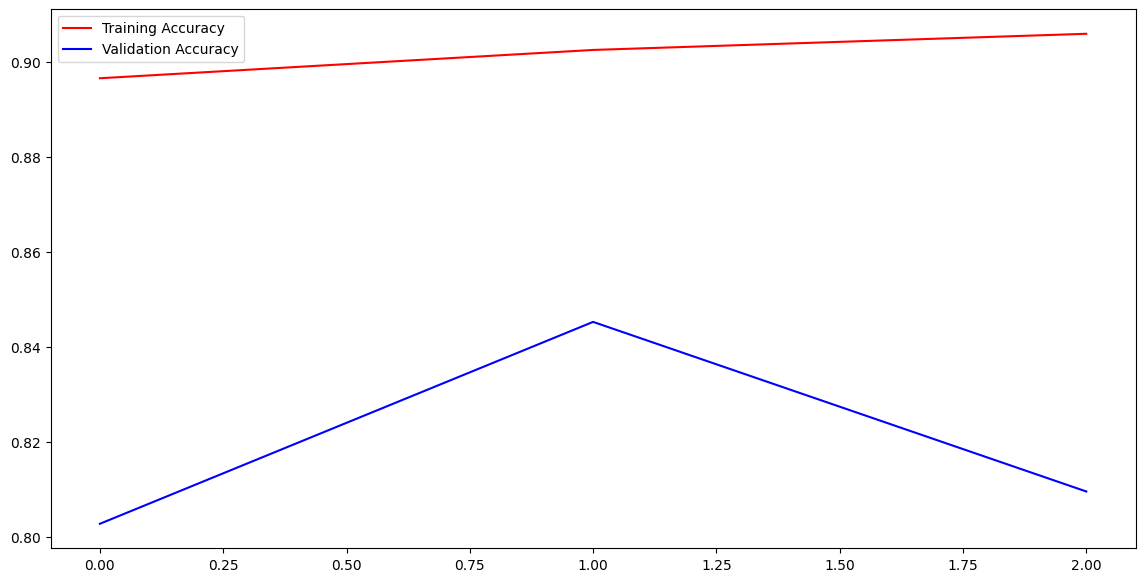

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


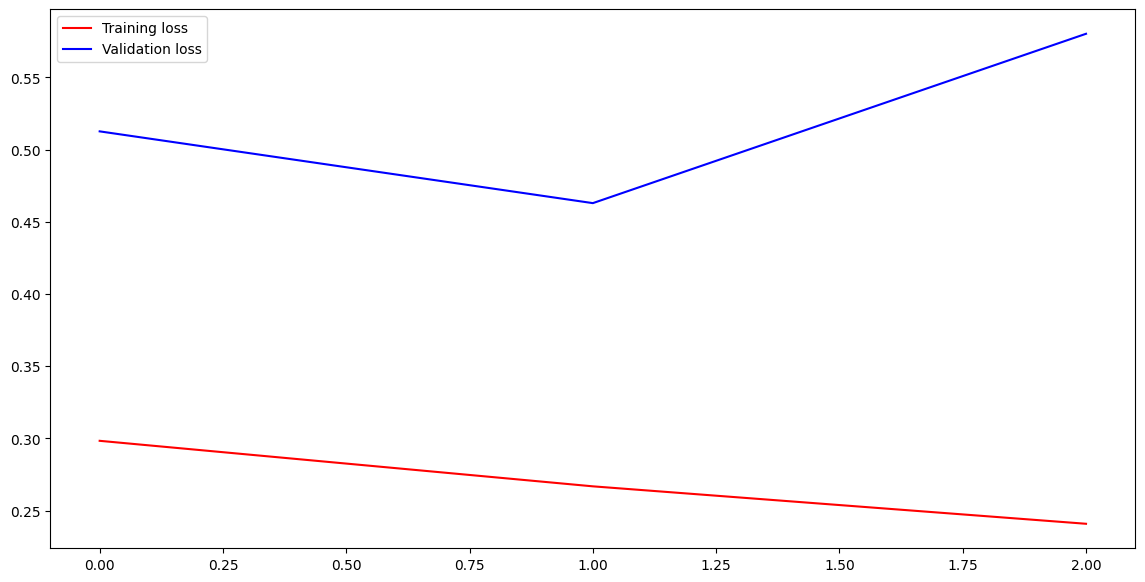

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [45]:
img = cv2.imread('/content/Testing/glioma_tumor/image(100).jpg', 0)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150)

In [46]:
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 150, 150)

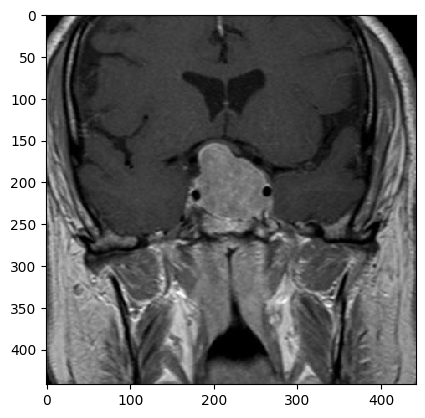

In [47]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Testing/pituitary_tumor/image(38).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [48]:
import numpy as np
import cv2
from keras.models import load_model

# Load the model
model = load_model('model.h5')

# Load and preprocess the image
img = cv2.imread('/content/Testing/pituitary_tumor/image(38).jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict using the model
predictions = model.predict(img_array)
indices = predictions.argmax()

print(indices)


1/1 [==============================] - 0s 202ms/step
3


In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Optionally, you can print the test loss as well
print(f'Test Loss: {test_loss:.4f}')

11/11 [==============================] - 18s 2s/step - loss: 0.4600 - accuracy: 0.8563
Test Accuracy: 85.63%
Test Loss: 0.4600
